In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from finta import TA as ta
from t_nachine.optimization import Analyzer
from tqdm import tqdm
import os

/home/abdelelyds/Workspace/PythonProjects/just-trade-it/t_nachine/backtester/core/_plotting.py:43: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `core.set_bokeh_output(notebook=False)`.
  warnings.warn(


Loading BokehJS ...

In [22]:
path1 = "logs/extreme_rsi.csv"

df = pd.read_csv(path1)

df.index = range(len(df))

analyzer = Analyzer(df)
results = analyzer.backtest_results
results = results[~results.Symbol.isna()]
results.SlPrice = results.EntryPrice - results.OneR

In [23]:
results.SlPrice.isna().sum()

0

In [24]:
def plot_chart(df, tp_price, sl_price, entry_price, path_to_save=None, show=False):
        # Create subplots and mention plot grid size
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                   vertical_spacing=0.01, 
                   row_width=[0.2, 0.7])

    fig.add_trace(go.Candlestick(x=df['Date'],
                    open=df['Open'], high=df['High'],
                    low=df['Low'], close=df['Close'], name="OHLC"), row=1, col=1)

    fig.add_trace(go.Scatter(x=df['Date'], 
                             y=df['EMA18'], 
                             name="EMA18", 
                             line=dict(color='blue'), 
                             line_width=1,
                             line_dash="dash"), row=1, col=1)

    fig.add_trace(go.Scatter(x=df['Date'], 
                             y=df['EMA50'], 
                             name="EMA50", 
                             line_width=1.1,
                             line=dict(color='green')), row=1, col=1)

    fig.add_trace(go.Scatter(x=df['Date'], 
                             y=df['EMA100'], 
                             name="EMA100", 
                             line_width=1.7), row=1, col=1)

    fig.add_trace(go.Scatter(x=df['Date'], 
                             y=df['EMA200'], 
                             name="EMA200",
                             line_width=2.5,
                             line=dict(color="red")), row=1, col=1)
    fig.add_hline(y=tp_price, line=dict(color='green'), row=1, col=1)
    fig.add_hline(y=entry_price, line_width=1, row=1, col=1)
    fig.add_hline(y=sl_price, line_width = 1.5, line=dict(color='red'), row=1, col=1)



    # include a go.Bar trace for volumes
    fig.add_trace(
        go.Bar(x=df['Date'], 
               y=df['Volume'], 
               showlegend=False
              ), 
        row=2, 
        col=1
    )

    fig.update_layout(xaxis_rangeslider_visible=False,height=500, margin=go.layout.Margin(l=0.5, r=0.5, b=0.5, t=50))
    if show:
        fig.show()
    if path_to_save is not None:
        fig.write_image(path_to_save)
    

In [25]:
stocks_path = "../archive/Stocks/"
symbols = results.Symbol.unique()
bars_back = 100

for symbol in tqdm(symbols[4462:]):
    
    # indicators
    stock = pd.read_csv(os.path.join(stocks_path, symbol + '.us.txt'))
    stock['EMA50'] = ta.EMA(stock, 50)
    stock['EMA18'] = ta.EMA(stock, 18)
    stock['EMA100'] = ta.EMA(stock, 100)
    stock['EMA200'] = ta.EMA(stock, 200)

    trades = results[results.Symbol == symbol]
    
    for i, trade in trades.iterrows():
        sub_folder = "winning" if trade.WinningTrade else "losing"
        path_to_save = f"images/rsi/{sub_folder}/{symbol}_{trade.EntryTime}.png"
        try:
            
            df = stock.iloc[int(trade.EntryBar) - bars_back: int(trade.EntryBar)]
            tp_price = trade.TpPrice
            sl_price = trade.SlPrice
            entry_price = trade.EntryPrice
            plot_chart(df, tp_price, sl_price, entry_price, path_to_save=path_to_save)
        except IndexError:
            pass

100%|█████████████████████████████████████| 1512/1512 [1:22:01<00:00,  3.25s/it]


In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
l = os.listdir('images/rsi/losing/')
plt.rcParams["figure.figsize"] = (12,16)

img=mpimg.imread(f'images/rsi/losing/{l[10000]}')

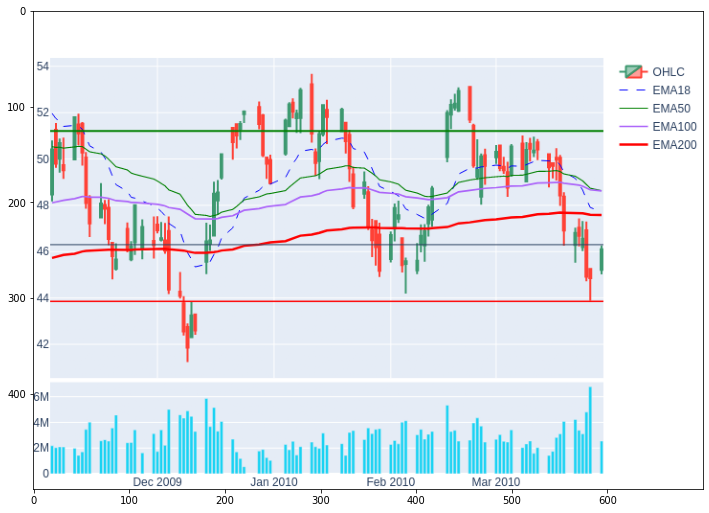

In [51]:
imgplot = plt.imshow(img)